In [6]:
# PERCEPTRONS
# the simplest neural network is the perceptron, which approximates a single neuron with n binary inputs. 
# It computes a weighted sum of its inputs and “fires” if that weighted sum is zero or greater

def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """returns 1 if the perceptron 'fires', 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

In [7]:
# The perceptron is simply distinguishing between the half spaces separated by the hyperplane of points x for which:

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
        for v_i, w_i in zip(v, w))

#dot(weights,x) + bias == 0
#weights = [2, 2]
#bias = -3

In [8]:
# However, there are some problems that simply can’t be solved by a single perceptron. For example, no matter how 
# hard you try, you cannot use a perceptron to build an XOR gate that outputs 1 if exactly one of its inputs is 1 
# and 0 otherwise. This is where we start needing more-complicated neural networks.

and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x == y else 1

In [9]:

# Feed-forward neural network that consists of discrete layers of neurons, each connected to the next. 
# This typically entails an input layer, one or more “hidden layers (each of which consists of neurons that take 
# the outputs of the previous layer, performs some calculation, and passes the result to the next layer
# and an output layer (which produces the final outputs)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

In [10]:
def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

In [11]:
def feed_forward(neural_network, input_vector):
    """takes in a neural network
    (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    # process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]              # add a bias input
        output = [neuron_output(neuron, input_with_bias)  # compute the output
                  for neuron in layer]                    # for each neuron
        outputs.append(output)                            # and remember it

        # then the input to the next layer is the output of this one
        input_vector = output

    return outputs

In [12]:
import math

xor_network = [# hidden layer
               [[20, 20, -30],      # 'and' neuron
                [20, 20, -10]],     # 'or'  neuron
               # output layer
               [[-60, 60, -30]]]    # '2nd input but not 1st input' neuron

for x in [0, 1]:
    for y in [0, 1]:
        # feed_forward produces the outputs of every neuron
        # feed_forward[-1] is the outputs of the output-layer neurons
        print x, y, feed_forward(xor_network,[x, y])[-1]

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


In [13]:
def backpropagate(network, input_vector, targets):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, targets)]

    # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output

    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in output_layer])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input 

In [14]:
# Example: Defeating a CAPTCHA

# In particular, he’d like to show users a picture of a digit and require them to input that digit to prove 
# they’re human.

zero_digit = [1,1,1,1,1,
              1,0,0,0,1,
              1,0,0,0,1,
              1,0,0,0,1,
              1,1,1,1,1]

In [15]:
# We’ll want our output to indicate which digit the neural network thinks it is, so we’ll need 10 outputs. 
# The correct output for digit 4, for instance, will be:

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [16]:
# “Then, assuming our inputs are correctly ordered from 0 to 9, our targets will be:

targets = [[1 if i == j else 0 for i in range(10)]
           for j in range(10)]

In [17]:
# At which point we’re ready to build our neural network:

import random 

random.seed(0)      # to get repeatable results
input_size = 25     # each input is a vector of length 25
num_hidden = 5      # we'll have 5 neurons in the hidden layer
output_size = 10    # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)]
                for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)]
                for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]

In [22]:
    raw_digits = [
          """11111
             1...1
             1...1
             1...1
             11111""",

          """..1..
             ..1..
             ..1..
             ..1..
             ..1..""",

          """11111
             ....1
             11111
             1....
             11111""",

          """11111
             ....1
             11111
             ....1
             11111""",

          """1...1
             1...1
             11111
             ....1
             ....1""",

          """11111
             1....
             11111
             ....1
             11111""",

          """11111
             1....
             11111
             1...1
             11111""",

          """11111
             ....1
             ....1
             ....1
             ....1""",

          """11111
             1...1
             11111
             1...1
             11111""",

          """11111
             1...1
             11111
             ....1
             11111"""]

    def make_digit(raw_digit):
        return [1 if c == '1' else 0
                for row in raw_digit.split("\n")
                for c in row.strip()]
    
inputs = list(map(make_digit, raw_digits))    

In [23]:
# And we can train it using the backpropagation algorithm:

# 10,000 iterations seems enough to converge
for __ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

In [24]:
def predict(input):
    return feed_forward(network, input)[-1]

predict(inputs[7])
# [0.026, 0.0, 0.0, 0.018, 0.001, 0.0, 0.0, 0.967, 0.0, 0.0]

[0.0253613342567603,
 1.0763103307031964e-05,
 1.2345860565941365e-10,
 0.017928582780863102,
 0.0008665440350657816,
 5.979309218296072e-10,
 3.267997415221431e-08,
 0.967411806405591,
 1.66229065217321e-08,
 4.394241877748721e-08]

In [25]:
# Which indicates that the digit 7 output neuron produces 0.97, while all the other output neurons 
# produce very small numbers. But we can also apply it to differently drawn digits, like my stylized 3:

predict([0,1,1,1,0,  # .@@@.
         0,0,0,1,1,  # ...@@
         0,0,1,1,0,  # ..@@.
         0,0,0,1,1,  # ...@@
         0,1,1,1,0]) # .@@@.

# [0.0, 0.0, 0.0, 0.92, 0.0, 0.0, 0.0, 0.01, 0.0, 0.12]

[1.0101045598243533e-08,
 0.001726887935497551,
 1.78191113310607e-08,
 0.9344276025778887,
 5.097944343977291e-07,
 3.6294250408123e-06,
 2.2726529247374686e-10,
 0.007047567870016199,
 3.9216678958134186e-08,
 0.09973408445781098]

In [26]:
# The network still thinks it looks like a 3, whereas my stylized 8 gets votes for being a 5, an 8, and a 9:

predict([0,1,1,1,0,  # .@@@.
         1,0,0,1,1,  # @..@@
         0,1,1,1,0,  # .@@@.
         1,0,0,1,1,  # @..@@
         0,1,1,1,0]) # .@@@.

# [0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.0, 0.0, 0.93, 1.0]

[2.0462000883297418e-06,
 4.3282683762421793e-13,
 7.538605319160643e-09,
 0.00046289833754861753,
 1.0265125035042659e-10,
 0.5362247897883677,
 2.63374015575664e-05,
 6.728904926488385e-08,
 0.9146090904428066,
 0.9957966984536238]

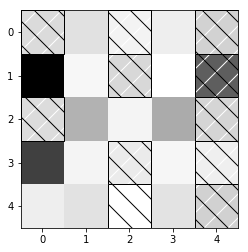

In [29]:
from matplotlib import pyplot as plt

weights = network[0][0]               # first neuron in hidden layer
abs_weights = map(abs, weights)       # darkness only depends on absolute value


grid = [abs_weights[row:(row+5)]      # turn the weights into a 5x5 grid
        for row in range(0,25,5)]     # [weights[0:5], ..., weights[20:25]]

ax = plt.gca()                        # to use hatching, we'll need the axis

ax.imshow(grid,                       # here same as plt.imshow
          cmap=matplotlib.cm.binary,  # use white-black color scale
          interpolation='none')       # plot blocks as blocks

def patch(x, y, hatch, color):
    """return a matplotlib 'patch' object with the specified
    location, crosshatch pattern, and color"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                        hatch=hatch, fill=False, color=color)

# cross-hatch the negative weights
for i in range(5):                    # row
    for j in range(5):                # column
        if weights[5*i + j] < 0:      # row i, column j = weights[5*i + j]
            # add black and white hatches, so visible whether dark or light
            ax.add_patch(patch(j, i, '/',  "white"))
            ax.add_patch(patch(j, i, '\\', "black"))

plt.show()

In [30]:
left_column_only = [1, 0, 0, 0, 0] * 5
print feed_forward(network, left_column_only)[0][0]  # 1.0

center_middle_row = [0, 0, 0, 0, 0] * 2 + [0, 1, 1, 1, 0] + [0, 0, 0, 0, 0] * 2
print feed_forward(network, center_middle_row)[0][0]  # 0.95

right_column_only = [0, 0, 0, 0, 1] * 5
print feed_forward(network, right_column_only)[0][0]  # 0.0

0.999959524615
0.954107627065
8.71509188498e-09


In [31]:
my_three =  [0,1,1,1,0,  # .@@@.
             0,0,0,1,1,  # ...@@
             0,0,1,1,0,  # ..@@.
             0,0,0,1,1,  # ...@@
             0,1,1,1,0]  # .@@@.

hidden, output = feed_forward(network, my_three)

In [32]:
sigmoid(.121 * -11.61 + 1 * -2.17 + 1 * 9.31 - 1.38 * 1 - 0 * 11.47 - 1.92)

0.9194716562747247